In [1]:
import numpy as np
import os
import itertools
import glob
import random
import shutil
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [2]:
# Creating train,test,validation floders for 2 classes

os.chdir("C:/Users/mohit/Computer Vision-Image Processing/Classification Cat-Dog/cat-dog datatset")

if os.path.isdir("train/dog") is False:
    os.makedirs("train/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/dog")
    os.makedirs("valid/cat")
    os.makedirs("test/dog")
    os.makedirs("test/cat")
    
    for c in random.sample(glob.glob("cat*"), 200):
        shutil.move(c, "train/cat")
    for c in random.sample(glob.glob("dog*"), 200):
        shutil.move(c, "train/dog")
    for c in random.sample(glob.glob("cat*"), 100):
        shutil.move(c, "valid/cat")
    for c in random.sample(glob.glob("dog*"), 100):
        shutil.move(c, "valid/dog")
    for c in random.sample(glob.glob("cat*"), 50):
        shutil.move(c, "test/cat")
    for c in random.sample(glob.glob("dog*"), 50):
        shutil.move(c, "test/dog")

os.chdir("../../")

In [7]:
train_path = "C:/Users/mohit/Computer Vision-Image Processing/Classification Cat-Dog/cat-dog datatset/train"
test_path = "C:/Users/mohit/Computer Vision-Image Processing/Classification Cat-Dog/cat-dog datatset/test"
valid_path = "C:/Users/mohit/Computer Vision-Image Processing/Classification Cat-Dog/cat-dog datatset/valid"

In [8]:
# Preprocessing the Images

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Model Building

**CNN Model**

In [9]:
# Data Augmentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [10]:
model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation='softmax')
])

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)       

In [12]:
model1.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
hist1 = model1.fit(train_batches, validation_data=valid_batches, shuffle=True, batch_size=10 , epochs=20)

Epoch 1/20
40/40 [==============================] - 13s 84ms/step - loss: 11.6784 - accuracy: 0.5275 - val_loss: 1.5529 - val_accuracy: 0.5600
Epoch 2/20
40/40 [==============================] - 2s 56ms/step - loss: 1.7915 - accuracy: 0.5800 - val_loss: 2.7958 - val_accuracy: 0.5000
Epoch 3/20
40/40 [==============================] - 2s 43ms/step - loss: 1.2057 - accuracy: 0.6400 - val_loss: 1.8136 - val_accuracy: 0.5400
Epoch 4/20
40/40 [==============================] - 2s 41ms/step - loss: 1.0980 - accuracy: 0.5950 - val_loss: 0.8965 - val_accuracy: 0.5750
Epoch 5/20
40/40 [==============================] - 2s 48ms/step - loss: 0.7421 - accuracy: 0.6300 - val_loss: 0.8545 - val_accuracy: 0.5800
Epoch 6/20
40/40 [==============================] - 2s 54ms/step - loss: 0.7774 - accuracy: 0.6600 - val_loss: 0.8814 - val_accuracy: 0.5800
Epoch 7/20
40/40 [==============================] - 2s 54ms/step - loss: 0.7398 - accuracy: 0.6900 - val_loss: 1.0199 - val_accuracy: 0.5950
Epoch 8/20


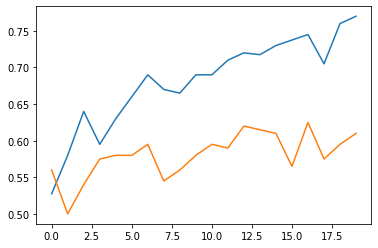

In [14]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])

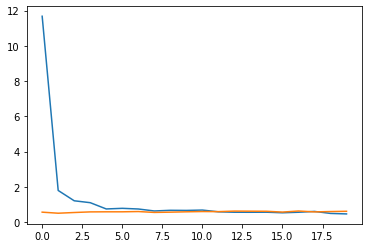

In [15]:
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_accuracy"])

In [16]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

In [17]:
pred = model1.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[1, 1, 0, 0, 1, 1, 1, 0, 1, 0]

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22 28]
 [15 35]]


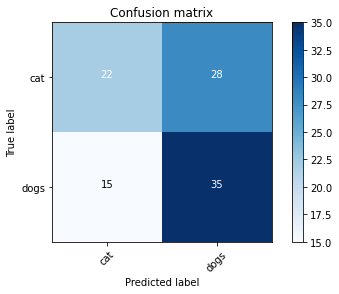

In [19]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=1))
plot_confusion_matrix(cm=cm, classes=["cat","dogs"])

**VGG16 Model**

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
for layer in model2.layers:
    layer.trainable = False

In [29]:
model2.add(Dense(units=2, activation="softmax"))

In [30]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [31]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
hist2 = model2.fit(x=train_batches, validation_data=valid_batches, shuffle=True, batch_size=5 , epochs=30)

Epoch 1/30
40/40 [==============================] - 13s 211ms/step - loss: 0.7210 - accuracy: 0.6925 - val_loss: 0.3013 - val_accuracy: 0.8850
Epoch 2/30
40/40 [==============================] - 8s 200ms/step - loss: 0.1768 - accuracy: 0.9350 - val_loss: 0.1847 - val_accuracy: 0.9200
Epoch 3/30
40/40 [==============================] - 8s 206ms/step - loss: 0.1054 - accuracy: 0.9625 - val_loss: 0.1546 - val_accuracy: 0.9350
Epoch 4/30
40/40 [==============================] - 8s 209ms/step - loss: 0.0728 - accuracy: 0.9725 - val_loss: 0.1410 - val_accuracy: 0.9500
Epoch 5/30
40/40 [==============================] - 8s 201ms/step - loss: 0.0528 - accuracy: 0.9800 - val_loss: 0.1277 - val_accuracy: 0.9550
Epoch 6/30
40/40 [==============================] - 8s 211ms/step - loss: 0.0406 - accuracy: 0.9900 - val_loss: 0.1206 - val_accuracy: 0.9550
Epoch 7/30
40/40 [==============================] - 8s 203ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.1163 - val_accuracy: 0.9550
Epoch

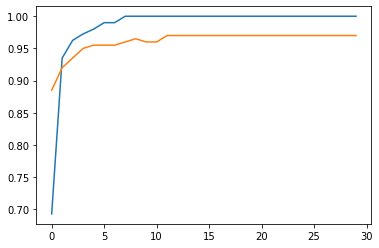

In [33]:
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history["val_accuracy"])

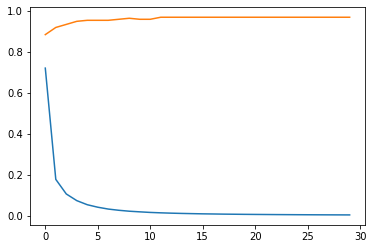

In [34]:
plt.plot(hist2.history["loss"])
plt.plot(hist2.history["val_accuracy"])

In [35]:
pred = model2.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]
y_classes[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[50  0]
 [ 0 50]]


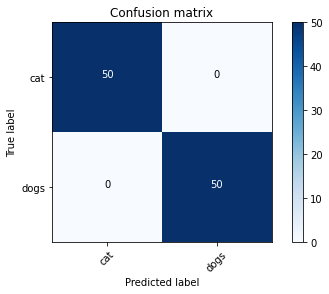

In [38]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(pred, axis=1))
plot_confusion_matrix(cm=cm, classes=["cat","dogs"])